In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
from cbrain.imports import *
from cbrain.utils import *
from matplotlib.animation import FuncAnimation
from IPython.display import SVG, HTML, FileLink

/home1/05488/tg847872/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
C_P

1004.64

In [119]:
DATA_DIR = '/scratch/05488/tg847872/'
%ls {DATA_DIR}

cloudbrain_ctrl_aquaplanet_03/      nnatmonly_fbp8_D004_andkua_nofix/
debug/                              nnatmonly_fbp8_D004_andkua_nofix_old/
E002_fullphy_fbp32/                 nnatmonly_fbp8_D004_andkua_qfix/
fbp32_sp_aqua_3KW1/                 nnatmonly_fbp8_D005_andkua_nofix/
fluxbypass_aqua/                    nnatmonly_fbp8_D005_andkua_nofix_old/
fluxbypass_aqua32/                  nnfullphy_fbp8_E001_3kw1/
galen_nonsp/                        nonsp_3kw1/
galen_sp/                           nonsp_3kw1_old/
nnatmonly_fbp8_D001_3kw1/           nonsp_4k/
nnatmonly_fbp8_D001_andkua/         nonsp_andkua/
nnatmonly_fbp8_D002_3kw1/           old_debug/
nnatmonly_fbp8_D002_andkua/         sp8fbp_3kw1/
nnatmonly_fbp8_D003_3kw1/           sp8fbp_3kw1_old/
nnatmonly_fbp8_D003_andkua/         sp8fbp_4k/
nnatmonly_fbp8_D003_andkua_nofix/   sp8fbp_andkua/
nnatmonly_fbp8_D004_andkua_msefix/


In [151]:
exps = ['sp8fbp_andkua','nnatmonly_fbp8_D002_andkua','nnatmonly_fbp8_D004_andkua_nofix','nnatmonly_fbp8_D005_andkua_nofix',
        'nnatmonly_fbp8_D004_andkua_qfix', 'nnatmonly_fbp8_D004_andkua_msefix', 'nnatmonly_fbp8_D004_andkua_allfix']

In [152]:
%%time
h0s = {e : xr.open_mfdataset(f'{DATA_DIR}{e}/*.h0.0000-*', decode_times=False) for e in exps}

CPU times: user 7.53 s, sys: 1.46 s, total: 8.99 s
Wall time: 17.3 s


In [7]:
def gw_avg(ds, var):
    return (ds[var] * ds['gw'].values.reshape(-1, 64, 1)).sum(dim=('lat', 'lon')) / 2

In [124]:
for d in h0s.values(): 
    d['vTAP'] = vint(d, 'TAP', C_P); d['vQAP'] = vint(d, 'QAP', L_V)
    d['vTPHY'] = vint(d, 'TPHYSTND', C_P); d['vPHQ'] = vint(d, 'PHQ', L_V)

In [9]:
def compare_line(func, exps, ax=None, **kwargs):
    if ax is None: fig, ax = plt.subplots(figsize=(6, 5))
    [func(h0s[e]).plot(ax=ax, label=e, **kwargs) for e in exps]
    ax.legend()

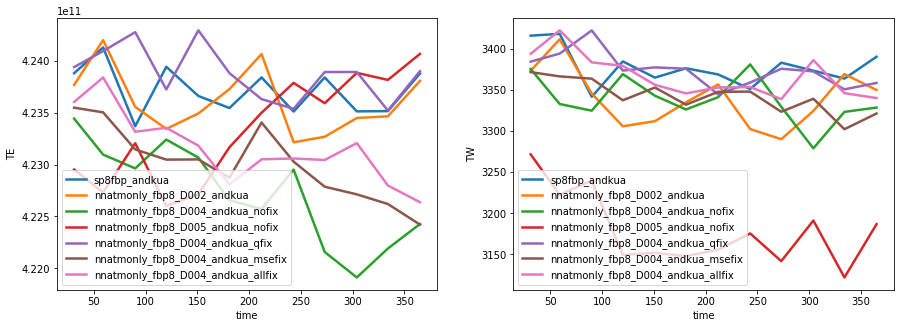

In [153]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
compare_line(lambda d: gw_avg(d, 'TE'), exps, ax=axs[0], lw=2.5)
compare_line(lambda d: gw_avg(d, 'TW'), exps, ax=axs[1], lw=2.5)

In [154]:
dslong = xr.open_mfdataset(f'/scratch/05488/tg847872/nnatmonly_fbp8_D004_andkua_allfix/*.h0.000*', decode_times=False)

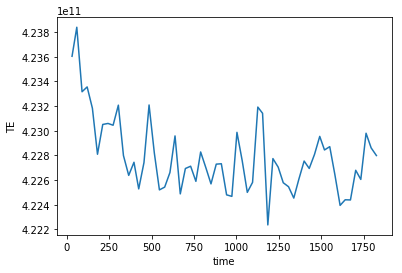

In [156]:
gw_avg(dslong, 'TE').plot();

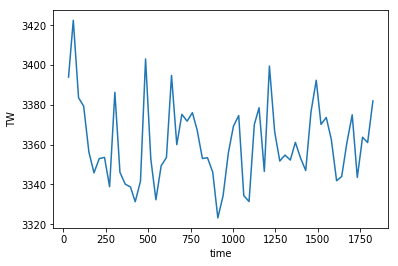

In [157]:
gw_avg(dslong, 'TW').plot();

## Check moisture fix

In [16]:
DATADIR = '/scratch/05488/tg847872/nnatmonly_fbp8_D004_andkua_fix/'

In [77]:
ds = xr.open_mfdataset(f'{DATADIR}nnatmonly_fbp8_D004_andkua_f.cam2.h1*', decode_times=False)
ds2 = xr.open_mfdataset(f'{DATADIR}nnatmonly_fbp8_D004_andkua_f.cam2.h1*', decode_times=False)

In [72]:
t=5

In [79]:
for d in [ds, ds2]:
    d['vNNDQ'] = vint(d, 'NNDQ', 1)
    d['vPPDQ'] = vint(d, 'PPDQ', 1)
    d['vPHQ'] = vint(d, 'PHQ', 1)
    d['NNERRQ'] = d['vNNDQ'] - d['NNLHF']/L_V + d['NNPRECT']*1e3
    d['PPERRQ'] = d['vPPDQ'] - d['NNLHF']/L_V + d['PPPRECT']*1e3

In [74]:
ds['NNERRQ'] = ds['vNNDQ'] - ds['NNLHF']/L_V + ds['NNPRECT']*1e3
ds['PPERRQ'] = ds['vPPDQ'] - ds['NNLHF']/L_V + ds['PPPRECT']*1e3

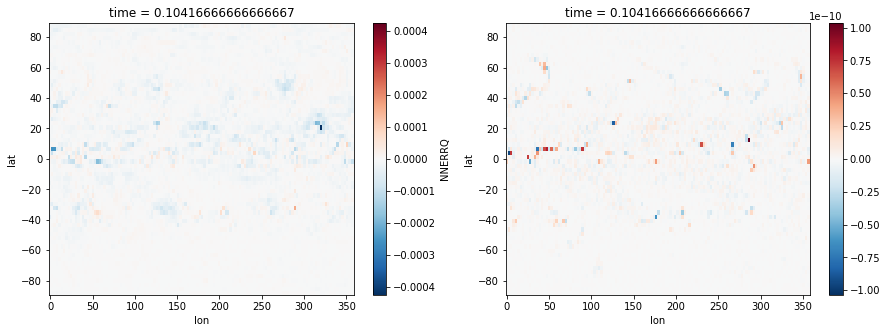

In [60]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
ds['NNERRQ'].isel(time=t).plot(ax=axs[0]);
(ds['NNERRQ'].isel(time=t)- ds['ERRQ'].isel(time=t)).plot(ax=axs[1]);

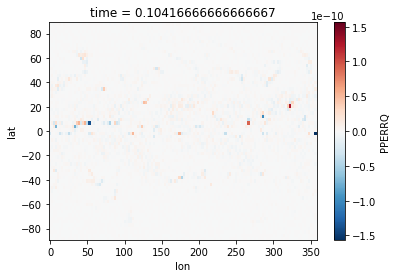

In [61]:
ds['PPERRQ'].isel(time=t).plot();

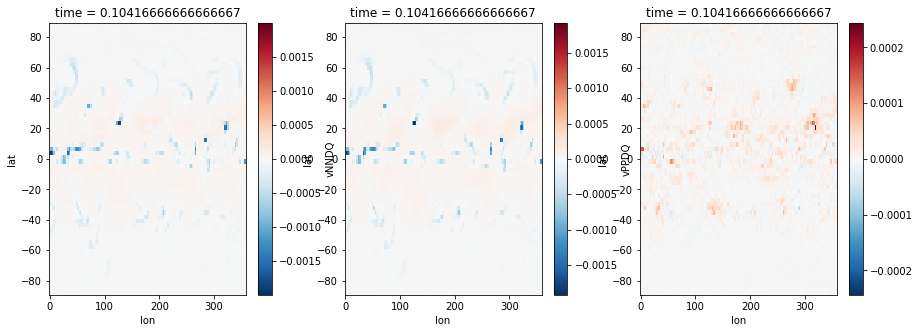

In [62]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
ds['vNNDQ'].isel(time=t).plot(ax=axs[0]);
ds['vPPDQ'].isel(time=t).plot(ax=axs[1]);
(ds['vPPDQ']- ds['vNNDQ']).isel(time=t).plot(ax=axs[2]);

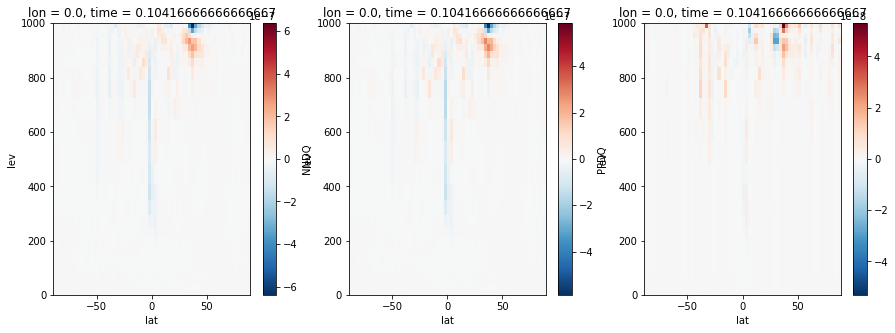

In [65]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
ds['NNDQ'].isel(time=t, lon=0).plot(ax=axs[0]);
ds['PPDQ'].isel(time=t, lon=0).plot(ax=axs[1]);
(ds['PPDQ']- ds['NNDQ']).isel(time=t, lon=0).plot(ax=axs[2]);

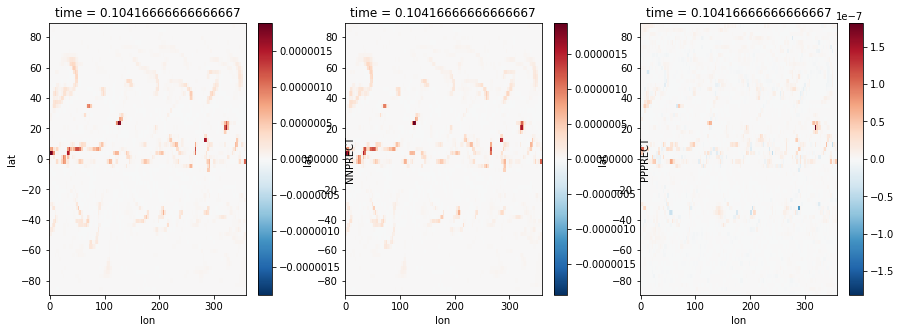

In [63]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
ds['NNPRECT'].isel(time=t).plot(ax=axs[0]);
ds['PPPRECT'].isel(time=t).plot(ax=axs[1]);
(ds['PPPRECT']- ds['NNPRECT']).isel(time=t).plot(ax=axs[2]);

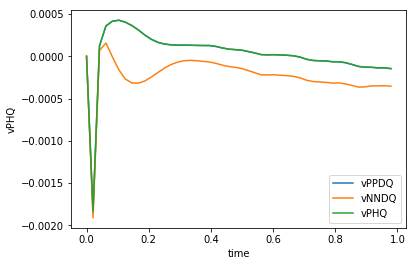

In [80]:
gw_avg(ds, 'vPPDQ').plot(label='vPPDQ')
gw_avg(ds, 'vNNDQ').plot(label='vNNDQ')
gw_avg(ds, 'vPHQ').plot(label='vPHQ')
plt.legend();

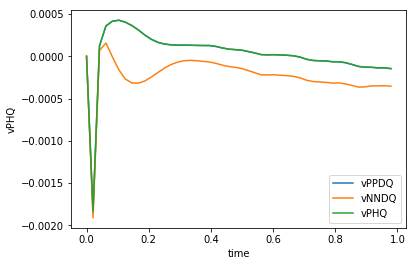

In [81]:
gw_avg(ds2, 'vPPDQ').plot(label='vPPDQ')
gw_avg(ds2, 'vNNDQ').plot(label='vNNDQ')
gw_avg(ds2, 'vPHQ').plot(label='vPHQ')
plt.legend();

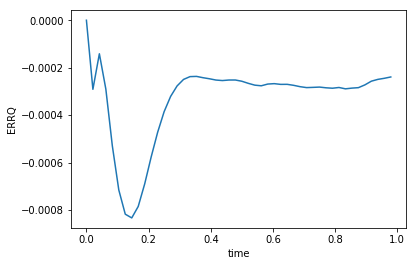

In [82]:
gw_avg(ds, 'ERRQ').plot()

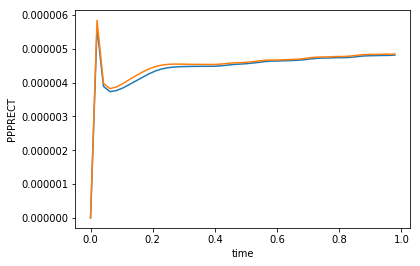

In [84]:
gw_avg(ds, 'NNPRECT').plot()
gw_avg(ds, 'PPPRECT').plot()

## Check MSE Fix

In [106]:
t=10

In [85]:
DATADIR = '/scratch/05488/tg847872/nnatmonly_fbp8_D004_andkua_msefix/'

In [102]:
ds = xr.open_mfdataset(f'{DATADIR}nnatmonly_fbp8_D004_andkua_f.cam2.h1*', decode_times=False)

In [103]:
ds['vTAP'] = vint(ds, 'TAP', C_P); ds['vQAP'] = vint(ds, 'QAP', L_V)

In [104]:
ds['vNNDT'] = vint(ds, 'NNDT', C_P); ds['vNNDQ'] = vint(ds, 'NNDQ', L_V)
ds['dNNRAD'] = ds['NNFSNT'] - ds['NNFSNS'] - ds['NNFLNT'] + ds['NNFLNS']
ds['NNERRT'] = ds['vNNDT'] - ds['NNSHF'] - ds['dNNRAD'] + ds['vNNDQ'] - ds['NNLHF']

In [105]:
ds['vPPDT'] = vint(ds, 'PPDT', C_P); ds['vPPDQ'] = vint(ds, 'PPDQ', L_V)
ds['dPPRAD'] = ds['PPFSNT'] - ds['PPFSNS'] - ds['PPFLNT'] + ds['PPFLNS']
ds['PPERRT'] = ds['vPPDT'] - ds['NNSHF'] - ds['dPPRAD'] + ds['vPPDQ'] - ds['NNLHF']

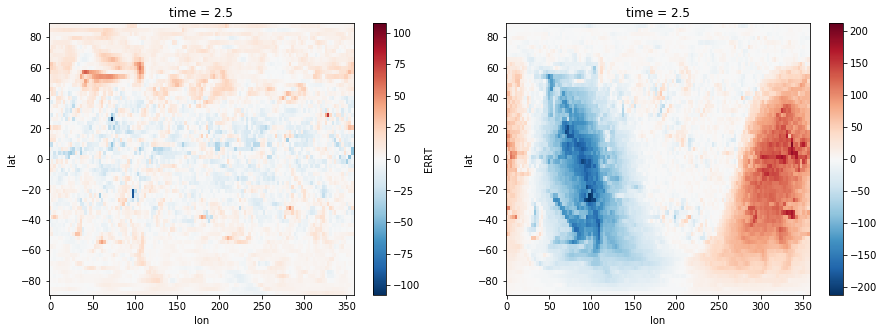

In [107]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
ds['ERRT'].isel(time=t).plot(ax=axs[0]);
(ds['NNERRT'].isel(time=t)- ds['ERRT'].isel(time=t)).plot(ax=axs[1]);

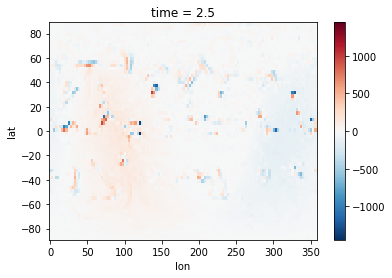

In [114]:
(ds['vPPDT'].isel(time=t)- ds['vNNDT']).isel(time=t).plot(); plt.show()

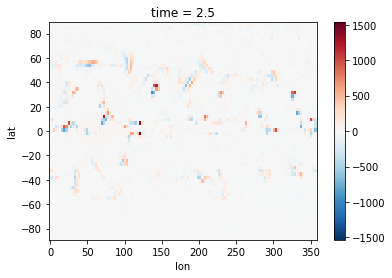

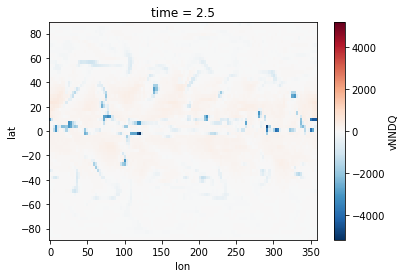

In [118]:
(ds['vPPDQ'] - ds['vNNDQ']).isel(time=t).plot(); plt.show()
ds['vNNDQ'].isel(time=t).plot(); plt.show()

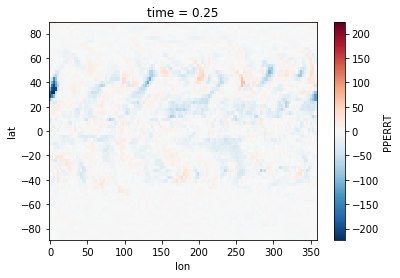

In [39]:
ds['PPERRT'].isel(time=1).plot();

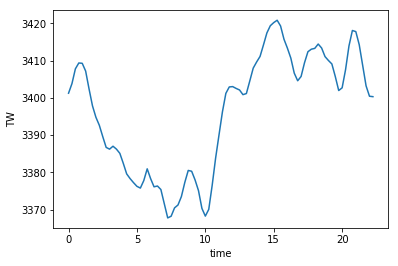

In [34]:
gw_avg(ds, 'TW').plot()

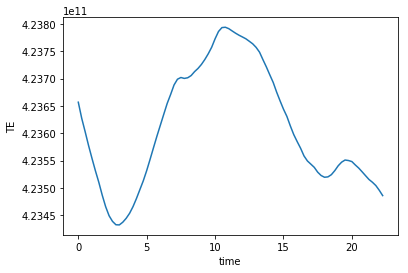

In [36]:
gw_avg(ds, 'TE').plot()

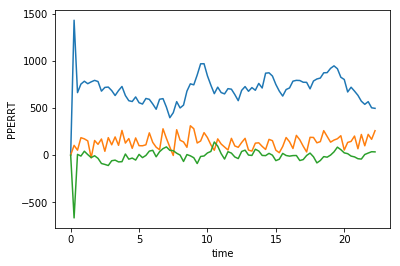

In [35]:
gw_avg(ds, 'ERRT').plot()
gw_avg(ds, 'NNERRT').plot();
gw_avg(ds, 'PPERRT').plot();

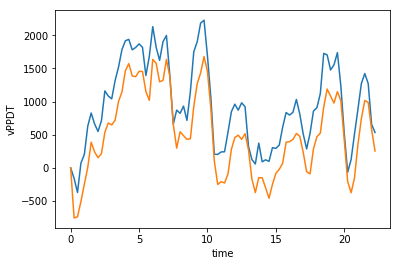

In [37]:
gw_avg(ds, 'vNNDT').plot();
gw_avg(ds, 'vPPDT').plot();

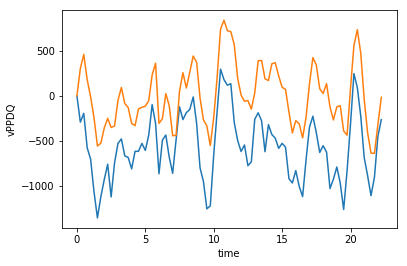

In [38]:
gw_avg(ds, 'vNNDQ').plot();
gw_avg(ds, 'vPPDQ').plot();

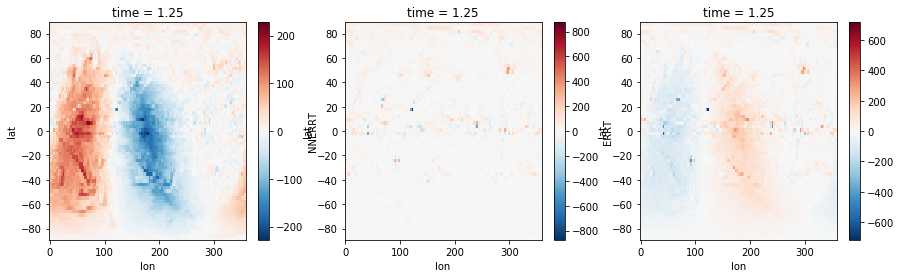

In [25]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
ds['NNERRT'].isel(time=5).plot(ax=axs[0])
ds['ERRT'].isel(time=5).plot(ax=axs[1])
(ds['ERRT'] - ds['NNERRT']).isel(time=5).plot(ax=axs[2]);

In [33]:
(ds['ERRT'] - ds['NNERRT']).isel(time=5).mean().values

array(-0.09085043)

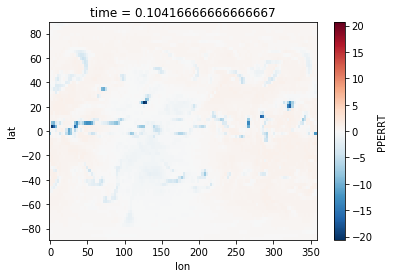

In [40]:
ds['PPERRT'].isel(time=5).plot()